# **Exploratory analysis - Third step: data analysis**

In [1]:
import sys
sys.path.append('../src') 

import pandas as pd

from data_analysis import *

## **1.) Data loading**

In [2]:
data = pd.read_csv("../data/results_processing.csv")

In [3]:
# Configure display to show all columns
pd.set_option('display.max_columns', None)

# Show the first 6 rows with all columns
data.head(6)

,type,boatClass,make,model,year,length_ft,beam_ft,dryWeight_lb,numEngines,totalHP,price,city,state,zip,created_date,created_month,created_year,condition__new,condition__used,hullMaterial__aluminum,hullMaterial__fiberglass,hullMaterial__other,fuelType__gasoline,fuelType__other,fuelType__unrecorded,engineCategory__other,engineCategory__outboard,engineCategory__unrecorded
0,power,power-deck,Bayliner,Element 180,1.000000,0.361702,0.368474,0.265884,0.5,0.234375,0.132724,Marietta,OH,45750,2019-11-02,0.909091,1.0,1,0,0,1,0,1,0,0,1,0,0
1,power,power-pontoon,Starcraft,EXS-3 Sport,0.944444,0.482979,0.422691,0.279231,0.5,0.625000,0.220512,Selbyville,DE,19975,2019-02-13,0.090909,1.0,1,0,1,0,0,1,0,0,1,0,0
2,power,power-bay,Xpress,Boats H22B,0.944444,0.446809,0.385040,0.202883,0.5,0.546875,0.182378,Fenton,MI,48430,2018-11-27,0.909091,0.5,1,0,1,0,0,1,0,0,0,1,0
3,power,power-bay,Xpress,Boats H20B,0.944444,0.404255,0.385040,0.190603,0.5,0.359375,0.112196,Fenton,MI,48430,2018-11-27,0.909091,0.5,1,0,1,0,0,1,0,0,0,1,0
4,power,power-pontoon,Sun Tracker,Party Barge 24 DLX,0.944444,0.535532,0.422691,0.292579,0.5,0.468750,0.174658,Fairland,IN,46126,2018-08-18,0.636364,0.5,1,0,1,0,0,0,0,1,0,1,0
5,power,power-pontoon,Sun Tracker,Party Barge 18 DLX,0.944444,0.404255,0.406124,0.198478,0.5,0.187500,0.109514,Fairland,IN,46126,2019-05-20,0.363636,1.0,1,0,1,0,0,0,0,1,0,1,0


## **2.) Correlation**

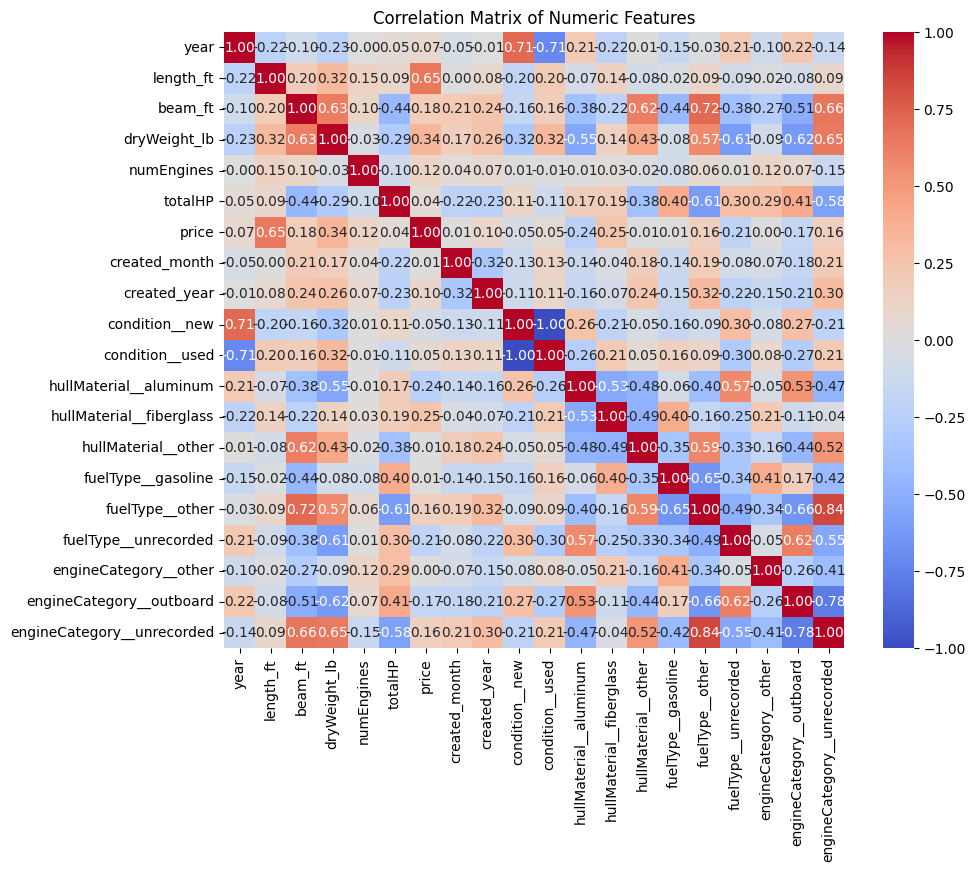

In [4]:
plot_correlation_heatmap(data)

Taking the feature 'price' as the target variable, only a high correlation is evident against the feature 'length_ft', achieving a value of 0.65. However, high correlations can be observed such as 0.84 between 'fuelType_other' and 'engineCategory_unrecorded', 0.72 between 'beam_ft' and 'fuelType_other' and 0.71 between 'year' and 'condition_new'. The above in terms of positive correlations. Although some high correlations are observed, correlations between variables ending in 'other' or 'unrecorded' are not desirable since they do not correspond to known categories.

## **3.) Data modeling**

In [5]:
# Load data and select numeric features
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Prepare data for training and testing
X_train, X_test, y_train, y_test = prepare_data(numeric_data)

# Train the XGBoost regression model
xgb_model = train_model(X_train, y_train)

# Evaluate the trained model
mse, mae, r2, y_pred = evaluate_model(xgb_model, X_test, y_test)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 0.005684991461254488
Mean Absolute Error (MAE): 0.04015841806860322
R-squared (R^2): 0.73585348160307


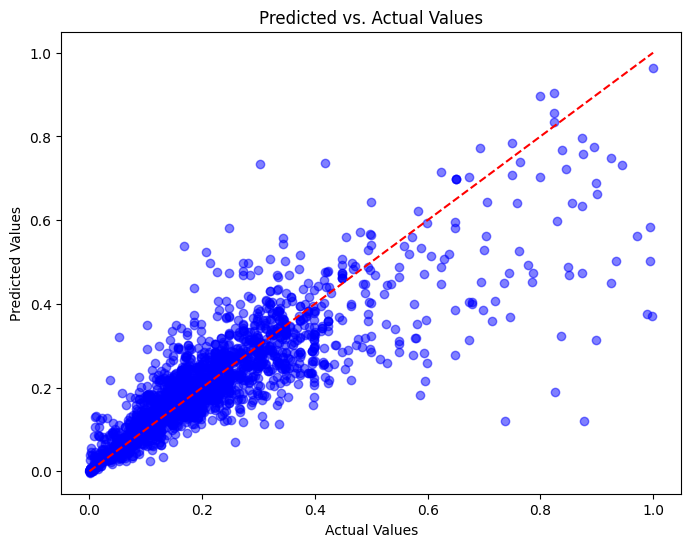

In [6]:
plot_predicted_vs_actual(y_test, y_pred)

**Observation:** In the "predicted vs actual values" plot, a noticeable dispersion for larger values suggests that the predictive model struggles to accurately predict higher values of the target variable. This dispersion could indicate potential issues such as overfitting, where the model captures noise instead of the underlying patterns in the data. Other factors like non-linear relationships between features and the target, the presence of outliers, or limitations in the model's complexity may also contribute to this observation. Addressing these issues could lead to improvements in the model's performance, particularly in predicting higher values of the target variable.

## **3.) Data visualization**

**Sales by state**

In [7]:
us_map = create_choropleth_map(data)
us_map

**The sales count over time for new and used boats.**

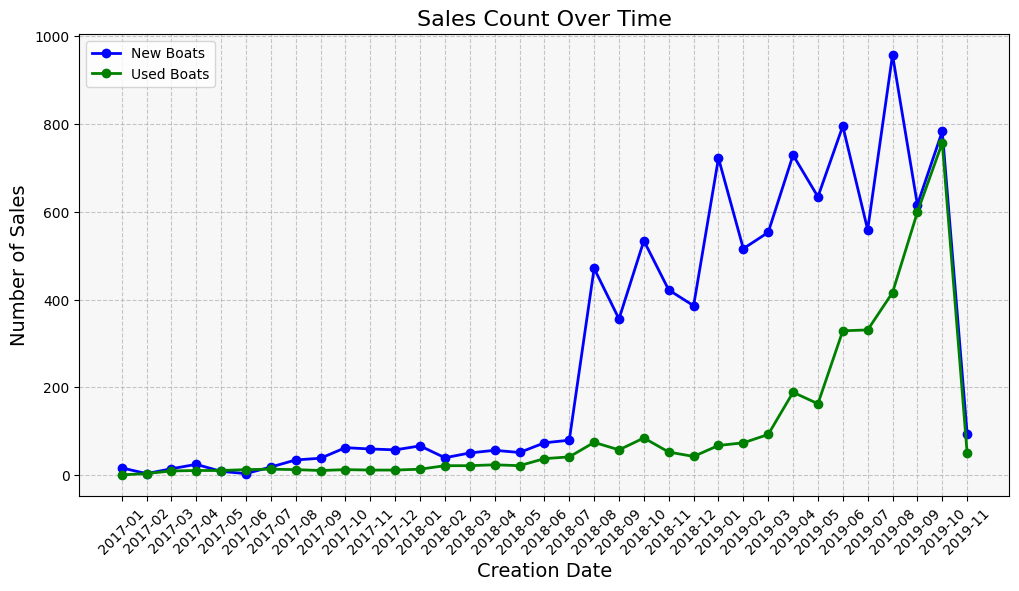

In [8]:
plot_sales_count_over_time(data)